# Notebook Configurations






## Mount GDrive

In [1]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/Tomato/

/content/drive/Shareddrives/Tomato


## Import Libraries

In [ ]:
!pip3 install tensorflow==2.5
!pip3 install tensorflow--gpu==2.5
!pip3 install imgaug
!pip install pixellib==0.5.2
!pip install labelme2coco==0.1.0
!pip install Pillow==8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 1.2 MB 57.4 MB/s 
     |████████████████████████████████| 14.8 MB 65.1 MB/s 
     |████████████████████████████████| 132 kB 77.1 MB/s 
     |████████████████████████████████| 4.0 MB 54.6 MB/s 
     |████████████████████████████████| 462 kB 76.8 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=bffbd7f76cdd45cf25c759ae50fd3074b3bf347b10edd7a62843f7fbe854c8db
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=3bc2cf90092b479592ac7527a33541b1a5b1d076d959c071b3222ea2250d5751
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built term

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 17 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 5.0 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 3.1 MB 51.6 MB/s 
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16033 sha256=d4406e4227aee007b72bdbc7cc5c726897971957f08bedfe28be3f8fa155e753
  Stored in directory: /root/.cache/pip/wheels/da/7c/3e/296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=85295f112be8178

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: labelme2coco
    Found existing installation: labelme2coco 0.2.1
    Uninstalling labelme2coco-0.2.1:
      Successfully uninstalled labelme2coco-0.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 35.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sahi 0.10.7 requires pillow>=8.2.0, but you have pillow 8.0.0 which is incompatible.


## Replace MRCNN source code (configured)

Restart Runtime Here!

In [ ]:
import os, glob, shutil

training_batch = 'final_batch_1'
assert type(training_batch) is str, "Please set training batch first"

pixellib_folder = '/usr/local/lib/python3.7/dist-packages/pixellib'
my_sc_folder = f'/content/drive/Shareddrives/Tomato/{training_batch}'

file1 = '/custom_train.py'
file2 = '/mask_rcnn.py'

shutil.copy(f'{my_sc_folder}{file1}',f'{pixellib_folder}')
shutil.copy(f'{my_sc_folder}{file2}',f'{pixellib_folder}')


'/usr/local/lib/python3.7/dist-packages/pixellib/mask_rcnn.py'

## Connect and Test GPU

In [ ]:
import tensorflow, sys
from tensorflow import keras

print(sys.version)
print(f"tensorflow version: {tensorflow.version.VERSION}")
print(f"Num GPUs Available: {len(tensorflow.config.list_physical_devices('GPU'))}")
print(f"Is built with CUDA: {tensorflow.test.is_built_with_cuda()}")

# Prepare Paths and Parameters
Restart runtime before proceeding

Change working directory to the new folder

In [ ]:
cd /content/drive/Shareddrives/Tomato/

/content/drive/Shareddrives/Tomato


In [ ]:
# Paths and Filenames
training_batch = "final_batch_1"

assert type(training_batch) is str, "Please set training batch first"
dataset_name = "tomato"   # name of dataset
dataset_path = f"dataset/{dataset_name}"  # folder path of the dataset 
path_trained_models = f"{training_batch}/{dataset_name}_models"  # folder path to store the trained models
pretrained_model = f"{training_batch}/mask_rcnn_coco.h5"  # file path of the pretrained model
evaluate_model = path_trained_models  # folder path to evaluate the trained models


# Metrics Logging parameters
csv_logger_filename=f'{training_batch}/training_metrics.csv'
eval_metrics_filename=f'{training_batch}/evaluation_metrics.csv'
configuration_filepath=f'{training_batch}/configuration.csv'
figure_path_MLM=f'{training_batch}/plot.png'


# Training parameters
network_backbone = "resnet101"
num_classes = 2
batch_size = 2
detection_threshold = 0.7
num_epochs = 20
augmentation = True

# Augmentation parameters
# at custom_train.py
flipH=0.5 # factor by how much of dataset is flipped horizontally
flipV=0.5 # factor by how much of dataset is flipped vertically
blur=3.0 # amount of gaussian blur applied to augmented images

# HyperParams
# at mask_rcnn.py
learning_rate = 0.001
learning_momentum = 0.9

# ReduceLROnPlateau parameters
# at mask_rcnn.py
reduce_lr_factor=0.3 # factor by which the learning rate will be reduced
reduce_lr_patience=10 # number of epochs with no improvement after which learning rate will be reduced
reduce_lr_min_lr=0.0 # lower bound on the learning rate

# EarlyStopping parameters
# at mask_rcnn.py 
earlystop_patience=30 # number of epochs with no improvement after which training will stop

# Visualize, Train, Evaluate, and Infer

### Visualize Dataset

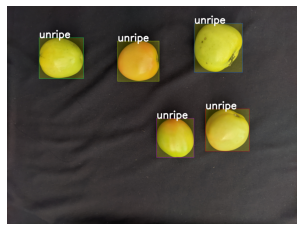

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training

vis_img = instance_custom_training()
vis_img.load_dataset(dataset_path)
vis_img.visualize_sample()

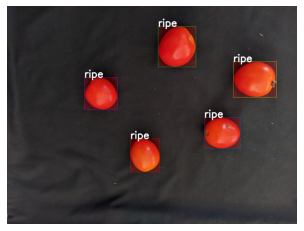

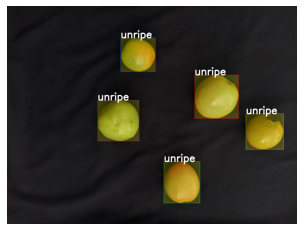

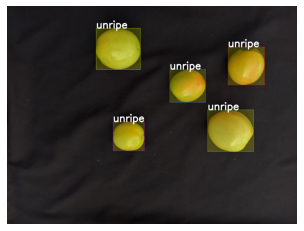

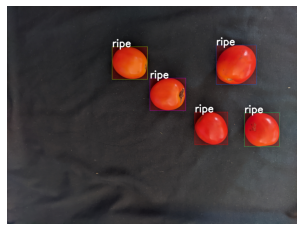

In [ ]:
vis_img.visualize_sample()
vis_img.visualize_sample()
vis_img.visualize_sample()
vis_img.visualize_sample()

### Model Training

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone=network_backbone, num_classes=num_classes, batch_size=batch_size,
                           learning_rate=learning_rate, learning_momentum=learning_rate)
train_maskrcnn.load_pretrained_model(pretrained_model)
train_maskrcnn.load_dataset(dataset_path)
train_maskrcnn.train_model(num_epochs=num_epochs, augmentation=augmentation, path_trained_models=path_trained_models, 
                           csv_logger_filename=csv_logger_filename,flipH=flipH,flipV=flipV,blur=blur,
                           reduce_lr_factor=reduce_lr_factor,reduce_lr_patience=reduce_lr_patience,
                           reduce_lr_min_lr=reduce_lr_min_lr,earlystop_patience=earlystop_patience)

Using resnet101 as network backbone For Mask R-CNN model


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Train 560 images
Validate 140 images
Applying augmentation on dataset
Checkpoint Path: /content/drive/Shareddrives/Tomato/final_batch_1/tomato_models
Selecting layers to train


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 2.0000 - loss: 0.7434 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.0242 - mrcnn_class_loss: 0.1877 - mrcnn_bbox_loss: 0.2191 - mrcnn_mask_loss: 0.3083
Epoch 00001: saving model to /content/drive/Shareddrives/Tomato/final_batch_1/tomato_models/mask_rcnn_model.001-0.251963.h5
100/100 [==============================] - 367s 3s/step - batch: 49.5000 - size: 2.0000 - loss: 0.7434 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.0242 - mrcnn_class_loss: 0.1877 - mrcnn_bbox_loss: 0.2191 - mrcnn_mask_loss: 0.3083 - val_loss: 0.2520 - val_rpn_class_loss: 4.9519e-04 - val_rpn_bbox_loss: 0.0098 - val_mrcnn_class_loss: 0.0179 - val_mrcnn_bbox_loss: 0.0416 - val_mrcnn_mask_loss: 0.1821 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 2.0000 - loss: 0.2477 - rpn_class_loss: 5.3798e-04 - rpn_bbox_loss: 0.0127 - mrcnn_class_loss: 0.0180 - mrcnn_bbox_loss: 0.0557 - mrcnn_mask_loss: 0

### Model Evaluation

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone=network_backbone, num_classes=num_classes,
                            learning_rate=learning_rate, learning_momentum=learning_rate)
train_maskrcnn.load_dataset(dataset_path)
train_maskrcnn.evaluate_model(evaluate_model,eval_metrics_filename=eval_metrics_filename)

Using resnet101 as network backbone For Mask R-CNN model


Instructions for updating:
Use fn_output_signature instead


final_batch_1/tomato_models/mask_rcnn_model.001-0.251963.h5 evaluation using iou_threshold 0.5 is 0.968286 

final_batch_1/tomato_models/mask_rcnn_model.002-0.189309.h5 evaluation using iou_threshold 0.5 is 0.966857 

final_batch_1/tomato_models/mask_rcnn_model.003-0.144684.h5 evaluation using iou_threshold 0.5 is 0.988571 

final_batch_1/tomato_models/mask_rcnn_model.004-0.151528.h5 evaluation using iou_threshold 0.5 is 0.990000 

final_batch_1/tomato_models/mask_rcnn_model.005-0.174371.h5 evaluation using iou_threshold 0.5 is 0.987143 

final_batch_1/tomato_models/mask_rcnn_model.006-0.110972.h5 evaluation using iou_threshold 0.5 is 0.990000 

final_batch_1/tomato_models/mask_rcnn_model.007-0.105997.h5 evaluation using iou_threshold 0.5 is 0.991429 

final_batch_1/tomato_models/mask_rcnn_model.008-0.220491.h5 evaluation using iou_threshold 0.5 is 0.990000 

final_batch_1/tomato_models/mask_rcnn_model.009-0.100675.h5 evaluation using iou_threshold 0.5 is 0.991429 

final_batch_1/tomat

### Saving Configurations

In [ ]:
import pandas as pd

# open configuration.csv and record the parameters used in training
config = pd.read_csv(configuration_filepath)
config_line = [training_batch,network_backbone,num_epochs,augmentation,flipH,flipV,blur,reduce_lr_factor,reduce_lr_patience,reduce_lr_min_lr,earlystop_patience,0,0,0,0,0,0]
config.loc[len(config.index)] = config_line

# read the best models in evaluation
evaluation = pd.read_csv(eval_metrics_filename)
evaluation.sort_values(by=['mAP(IoU)'],ascending=False, inplace=True)

# record the top 3 models to the config
for i in range(3):
  try:
    config["best_model_1"].iloc[-1] = evaluation['Model'].iloc[i]
    config["eval_1"].iloc[-1] = evaluation['mAP(IoU)'].iloc[i]
  except:
    pass
    
# save the config to csv
config.to_csv(configuration_filepath, index=False)

# view the config
config

,training_batch,network_backbone,num_epochs,augmentation,flipH,flipV,blur,reduce_lr_factor,reduce_lr_patience,reduce_lr_min_lr,earlystop_patience,best_model_1,eval_1,best_model_2,eval_2,best_model_3,eval_3
0,template,resnet50,1,True,0.5,0.5,3.0,0.3,10,0.0,30,template/tomato_models/mask_rcnn_model.001-0.8...,0.000595,template/tomato_models/mask_rcnn_model.001-1.4...,0.0,0,0
1,final_batch_1,resnet101,20,True,0.5,0.5,3.0,0.3,10,0.0,30,final_batch_1/tomato_models/mask_rcnn_model.01...,0.991429,0,0.0,0,0


#### Plot the Loss and mAP

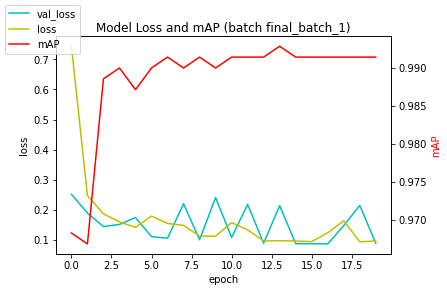

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

train_met = pd.read_csv(csv_logger_filename)
evaluation.sort_values(by=['Model'],ascending=True, inplace=True)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(train_met['val_loss'], label='val_loss', color='c')
ax.plot(train_met['loss'], label='loss', color='y')
         
ax2 = ax.twinx()
ax2.plot(evaluation['mAP(IoU)'], label='mAP', color='r')

fig.legend(loc="upper left")

ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax2.set_ylabel('mAP', color='r')

ax.set_title(f'Model Loss and mAP (batch {training_batch})')

plt.savefig(figure_path_MLM)
plt.show()

#### Model Inference

##### Image Segmentation

In [ ]:
import pixellib
from pixellib.instance import custom_segmentation

best_model_path = None
assert type(best_model_path) is str , 'Please add the path to the best model'

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes=2, class_names= ["BG", "ripe", "unripe"])
segment_image.load_model(best_model_path)
segment_image.segmentImage("/content/drive/Shareddrives/Tomato/tomato_infer_2.jpg", show_bboxes=True, output_image_name="sample_out.jpg")

In [ ]:
import pixellib
from pixellib.instance import custom_segmentation

best_model_path = None
assert type(best_model_path) is str , 'Please add the path to the best model'

test_video = custom_segmentation()
test_video.inferConfig(num_classes=2, class_names=["BG", "ripe", "unripe"])
test_video.load_model(best_model_path)
test_video.process_video("/content/drive/Shareddrives/Tomato/TOP TOMATO GREEN SCREEN[ BACKGROUND_ VIDEO HD__ ANIMATION GREEN SCREEN TOMATO RAIN.mp4", show_bboxes = True,  output_video_name="video_out-1.mp4", frames_per_second=15)